# Сборный проект

# Введение:

**Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).**

# Цель исследования:

**Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.**

# План исследования:

1. Изучить общую информацию.

2. Выполнить предобработку данных.

3. Провести исследовательский анализ данных.

4. Составить портрет пользователя каждого региона:

    Определить для пользователя каждого региона (NA, EU, JP):
      - Самые популярные платформы (топ-5).
      - Самые популярные жанры (топ-5). 
      - Влияет ли рейтинг ESRB на продажи в отдельном регионе?
      
      
5. Проверить гипотезы:

   - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
   - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
   

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
from scipy.stats import binom

## Шаг 1. Загрузка данных

### Сохраним данные в датафреймы

In [2]:
games = pd.read_csv('/datasets/games.csv')

### Выведим первые строки каждого набора данных, основную информацию о датафреймах с помощью метода `info()` и найдем явные дубликаты:

In [3]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
games.duplicated().sum()

0

In [6]:
set(games['Name'].unique())

{nan,
 'Anarchy Reigns',
 'Championship Motocross 2001 featuring Ricky Carmichael',
 'Broken Sword II: The Smoking Mirror',
 'Yakuza 3',
 'Fatal Fury: Battle Archives Volume 1 (JP sales)',
 'Tom and Jerry in War of the Whiskers',
 'Demon Gaze 2',
 'Bleach: Blade Battlers',
 'Burnout 3: Takedown',
 'Girls und Panzer: I Will Master Tankery',
 'The Sims 3: Late Night Expansion Pack',
 'Mortal Kombat',
 'River King: Wonderful Journey',
 'Rad Racer',
 'NBA Live 2001',
 'War Leaders: Clash of Nations',
 'Amplitude',
 'Hunter x Hunter: Wonder Adventure',
 'Harvest Moon GB',
 'NFL 2K2',
 'King Kong',
 'Mario & Wario',
 "Disney's The Little Mermaid: Ariel's Undersea Adventure",
 'Mah Jong Quest: Expeditions',
 'Titanfall 2',
 'DoDonPachi Saidaioujou',
 'International Superstar Soccer 2000',
 'Knockout Kings 2002',
 'Taiko no Tatsujin: Waku Waku Anime Matsuri',
 'Apex',
 'Winter Blast: 9 Snow & Ice Games',
 'Minna to Kimi no Piramekino!',
 'Bejeweled 3',
 'Playboy: The Mansion',
 'Xena: Warrior 

In [7]:
# Приведем к нижнему регисту имена игр, чтобы устранить неяные дубликаты
games['Name'] = games['Name'].str.lower()

In [8]:
len(games['Name'])

16715

Количество не изменилось, значит дубликатов не было с разным регистром.

In [9]:
# посмотрим сколько раз повторяется игра:
games['Name'].value_counts()

need for speed: most wanted                      12
madden nfl 07                                     9
fifa 14                                           9
lego marvel super heroes                          9
ratatouille                                       9
                                                 ..
the amazing spider-man (ds & mobile versions)     1
zhuzhu pets 2: featuring the wild bunch           1
descent                                           1
geten no hana                                     1
fireball                                          1
Name: Name, Length: 11559, dtype: int64

In [10]:
# Проверим дубликатность игры need for speed: most wanted:
games[games['Name'] == 'need for speed: most wanted']

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
253,need for speed: most wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,need for speed: most wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,need for speed: most wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,need for speed: most wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,need for speed: most wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,need for speed: most wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,need for speed: most wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,need for speed: most wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,need for speed: most wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,need for speed: most wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


Вероятней всего игра вносилась под разные продажи с обновлениями для разных платформ в разные годы. Аналогично и с другими играми.

In [11]:
games['Platform'].sort_values().unique()

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

Неявных дубликатов необнаружено у Platform.

In [12]:
games['Year_of_Release'].sort_values().unique()

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016.,   nan])

Неявных дубликатов необнаружено у Year_of_Release.

In [13]:
# найдем неявные дубликаты 
temp = games.copy()
temp[temp[['Name', 'Platform','Year_of_Release']].duplicated(keep=False)]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
604,madden nfl 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,madden nfl 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


In [14]:
games = games.drop(index=[604, 659, 14244, 16230 ])

**Промежуточный вывод на основе изученной общей информации:**
<p></p>

<div style="border:solid green 2px; padding: 10px">

1. Таблица состоит из 16715 записей.
2. Найдено 0 явных и неявных дубликатов.
3. Найдены пропуски.
4. Есть некорректный тип данных.
5. Название столбцов некорректны.
   
</div>

## Шаг 2. Подготовка данных

### Заменим названия столбцов (приведем к нижнему регистру):

In [15]:
games.columns = [x.lower() for x in games.columns]

In [16]:
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,new super mario bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,wii play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,new super mario bros. wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,duck hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### Обработаем пропуски 

In [17]:
# Заменим NaN на unknown:
games['genre'] = games['genre'].fillna('unknown')

In [18]:
# Заменим NaN на unknown:
games['name'] = games['name'].fillna('unknown')

In [19]:
# Убедимся были ли взаимосвязаны пропуски name с genre
games.query('name == "unknown"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [20]:
# Процент пропуска по годам составляет 1.6 %, данные не повлияют на анализ
# Удалим строки с пропусками:
games = games.dropna(subset = ['year_of_release'])

In [21]:
# Посмотрим уникальные значения у user_score:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

tbd - to be determined. Означает, что будет определено. Получается, что рейтинг еще не выставлен, то есть отсутствует.

In [22]:
# Посмотрим, сколько игр имеет рейтинг 0:
games.query('user_score == "0"').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2835,my little pony: pinkie pie's party,DS,2008.0,Adventure,0.66,0.0,0.0,0.06,NaN,0,E


In [23]:
# Заменим tbd на NaN, а после на -1, так как ноль уже присутсвует в рейтинге:
games['user_score'] = games['user_score'].replace('tbd', np.NaN)
games['user_score'] = games['user_score'].fillna(-1)

In [24]:
# Посмотрим данные по годам меньше 2000:
games.query('year_of_release < 2000').head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,-1,NaN
4,pokemon red/pokemon blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,-1,NaN
5,tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,-1,NaN
9,duck hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,-1,NaN
12,pokemon gold/pokemon silver,GB,1999.0,Role-Playing,9.00,6.18,7.20,0.71,NaN,-1,NaN
18,super mario world,SNES,1990.0,Platform,12.78,3.75,3.54,0.55,NaN,-1,NaN
21,super mario land,GB,1989.0,Platform,10.83,2.71,4.18,0.42,NaN,-1,NaN
22,super mario bros. 3,NES,1988.0,Platform,9.54,3.44,3.84,0.46,NaN,-1,NaN
30,pokémon yellow: special pikachu edition,GB,1998.0,Role-Playing,5.89,5.04,3.12,0.59,NaN,-1,NaN
45,super mario 64,N64,1996.0,Platform,6.91,2.85,1.91,0.23,NaN,-1,NaN


In [25]:
# Посмотрим уникальные значения у critic_score:
games['critic_score'].sort_values().unique()

array([13., 17., 19., 20., 21., 23., 24., 25., 26., 27., 28., 29., 30.,
       31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43.,
       44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56.,
       57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69.,
       70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81., 82.,
       83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94., 95.,
       96., 97., 98., nan])

Пропуски у critic_score, как мы видимо у игр вышедшие раньше 2000 имеются пропуски, что вероятней всего, ранее не ставилась оценка критика, поэтому заменим пропуски на ноль. 

In [26]:
# Заменим NaN на -1:
games['critic_score'] = games['critic_score'].fillna(-1)

Также пропуски у rating, как мы видимо у игр вышедшие раньше 2000 имеются пропуски, что вероятней всего, ранее не было рейтинга ESRB, поэтому заменим пропуски на NO ESRB.

In [27]:
games['rating'] = games['rating'].fillna('NO ESRB')

In [28]:
# Проверим датафрейм на пропуски:
games.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

### Преобразуем данные в нужные типы:

In [29]:
# Заменим тип данных у user_score на float, так как эти значения имеют вещестенные числа, а не строкой тип:
games['user_score'] = games['user_score'].astype('float')

In [30]:
# Заменим тип данных у year_of_release на int, так как года имеют целостное число:
games['year_of_release'] = games['year_of_release'].astype('int')

### Посчитаем суммарные продажи во всех регионах.

In [31]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales'] 
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,NO ESRB,40.24
2,mario kart wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,NO ESRB,31.38


<p></p>

<div style="border:solid green 2px; padding: 10px">
У нас были обнаружены пропуски в столбцах:

name, year_of_release, genre, critic_score, user_score и rating.
- В столбцах name и genre, были пропуски одновременно, они зависимы друг от друга, зная наименование игры, можно было бы заполнить пропуски с жанрами, возможно пропуск был по технической ошибки или при обработке данных были потеряны данные.  
- critic_score и user_score - пользовательские отзывы и отзывы критиков вероятней не ставились до 2000-х годов, поэтому в эти годы имеюся пропуски по отзывам.
- rating так ESRB - была основана в 1994 году, поэтому данные до этого года не имели рейтинга, также рейтинг ESRB - это рейтинг для США и Канады. А значит пропуск не связан с ошибкой заполнения данных, просто не только для Северной Америки выпускаются игры.


**Промежуточный вывод:**
<p></p>

<div style="border:solid green 2px; padding: 10px">

1. Обработали пропуски.
2. Заменили некорректые типы на корректные.
3. Название столбцов сделали корректными.
4. Добавили новый столбец total_sales - суммарные продажи во всех регионах.

   
</div>

In [32]:
# Посмотрим, что у нас осталось
temp = games.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,' : кол-во 0', temp[temp[col_l] == 0][col_l].count(),
        ', процент 0', round(temp[temp[col_l] == 0][col_l].count()/len(temp)*100, 2),'%')
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16442 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16442 non-null  object 
 1   platform         16442 non-null  object 
 2   year_of_release  16442 non-null  int64  
 3   genre            16442 non-null  object 
 4   na_sales         16442 non-null  float64
 5   eu_sales         16442 non-null  float64
 6   jp_sales         16442 non-null  float64
 7   other_sales      16442 non-null  float64
 8   critic_score     16442 non-null  float64
 9   user_score       16442 non-null  float64
 10  rating           16442 non-null  object 
 11  total_sales      16442 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' beyblade burst' ' fire emblem fates' " frozen: olaf's quest" ...
 'zwei!!' 'zyuden sentai kyoryuger: game de gaburincho!!'
 '¡shin chan flipa en c

## Шаг 3. Проведем исследовательский анализ данных

### Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

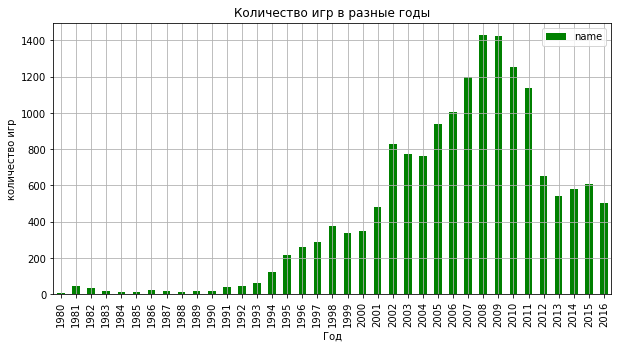

In [33]:
games.query('year_of_release != 0').pivot_table(index='year_of_release', values = 'name', aggfunc = 'count').sort_values(by='year_of_release', 
     ascending=True).plot(title = 'Количество игр в разные годы', kind = 'bar', grid = True, figsize=(10,5), color = 'green')
plt.xlabel('Год')
plt.ylabel('количество игр')
plt.show() 

**Вывод:** 

По графику можно заменить, чтоб в период с 1980 года по 1994 выпускалось мало игр, не во всех странах в то время были компьютеры, и это было неактуально, также было мало компаний, которые занимались играми. С 2002 года количество игр начало расти в большом количестве. Пик был с 2007 по 2011 год. Потом количество новых игр уменьшилось, вероятно, связано с эрой мобильных телефон и планшетов. Данные за все периоды не важны, актуальные и показательные данные могла быть с 2002 по 2016 год.

### Посмотрим, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

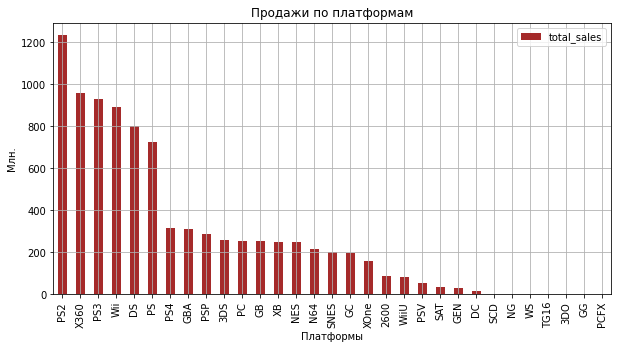

In [34]:
games.pivot_table(index='platform', values = 'total_sales', aggfunc = 'sum').sort_values(by='total_sales', 
     ascending=False).plot(title = 'Продажи по платформам',
     kind = 'bar', grid = True, figsize=(10,5), color = 'brown')
plt.xlabel('Платформы')
plt.ylabel('Млн.')
plt.show() 

Из графика видно, что самые популярные игровые платформы по продажам за весь период это PS2, X360, PS3, Wii, DS, PS.


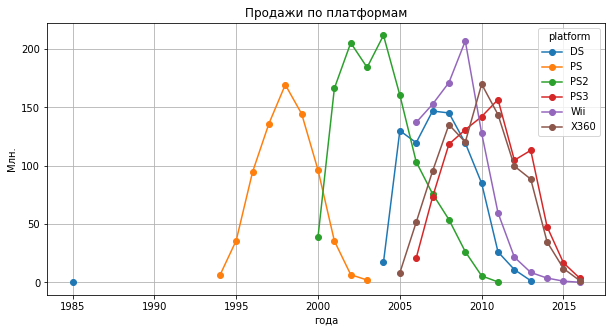

In [35]:
games.query('platform == ["PS2", "X360", "PS3", "Wii", "DS", "PS"] and year_of_release > 0').pivot_table(index=('year_of_release'), 
     columns= 'platform', values = 'total_sales', aggfunc = 'sum').plot(title = 'Продажи по платформам',
     style = 'o-', grid = True, figsize=(10,5))
plt.xlabel('года')
plt.ylabel('Млн.')
plt.show() 

**Вывод:** 
По графику можем оценить за какой период исчезают старые платформы и как скоро появляются новые и какой имеют срок:
- платформа PS прожила с 1994 по 2003 год (9 лет).
- платформа PS2 начала появляться параллельно живой PS c 2000 года по 2011 год (11 лет).
- платформа DS начала появляться параллельно живой PS2 c 2004 года по 2013 год (9 лет).
  Как мы видим на графике у платформы DS есть ошибка в 1985 году, DS в это время еще не существовала.
- платформа Wii начала появляться параллельно живой DS и PS2 c 2006 года по 2016 год (10 лет).
- платформа X360 начала появляться параллельно живой DS, PS2 и Wii  c 2005 года по 2016 год (9 лет).
- платформа PS3 начала появляться параллельно живой DS, PS2, X360  и Wii c 2006 года по 2016 год (10 лет).

По данным средний срок жизни консоли около 7 лет, возможно они бы продолжали работать дальше, но приходят новые консоли, они обновляются и становятся лучше. В старых уже нет потребности.

In [36]:
# Комментарий ревьюера
temp = games[games.year_of_release != 0].copy() 
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
time_life['life'].median()

7.0

### Возьмем данные за соответствующий актуальный период.

По данным выше, можно увидеть, что наиболее топовые платформы вышли с 2012 года по 2016 год. В этот период есть все данные, чтобы построить прогноз на 2017 год.

In [37]:
games_p = games.query('year_of_release >= 2012')
games_p.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,grand theft auto v,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,grand theft auto v,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,call of duty: black ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,NO ESRB,14.63
33,pokemon x/pokemon y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,NO ESRB,14.60
34,call of duty: black ops ii,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


### Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.

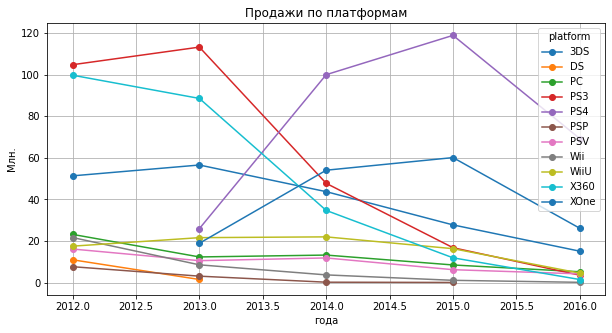

In [38]:
games_p.pivot_table(index=('year_of_release'), 
     columns= 'platform', values = 'total_sales', aggfunc = 'sum').plot(title = 'Продажи по платформам',
     style = 'o-', grid = True, figsize=(10,5))
plt.xlabel('года')
plt.ylabel('Млн.')
plt.show() 

**Вывод:**

Платформа PS3 больше всех заработала в 2012 году (больше 100 млн.), последующие год также была в топе.
В 2013 году вышла новая платформа PS4 и она начала лидировать ближе к 2014 году до конца 2016 года.
На 2016 год топ лидирующих платформ:
- PS4 
- XOne
- 3DC

### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.

In [39]:
games_p.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,396.0,0.491439,1.387161,0.01,0.0400,0.11,0.3125,14.60
DS,31.0,0.404839,1.439245,0.01,0.0200,0.05,0.1850,8.06
PC,250.0,0.250600,0.494640,0.01,0.0300,0.08,0.2400,5.14
PS3,491.0,0.582933,1.462888,0.01,0.0500,0.20,0.6100,21.05
PS4,392.0,0.801378,1.609456,0.01,0.0600,0.20,0.7300,14.63
PSP,173.0,0.064682,0.071296,0.01,0.0200,0.03,0.0900,0.36
PSV,411.0,0.119659,0.203011,0.01,0.0200,0.05,0.1200,1.96
Wii,54.0,0.655000,1.165447,0.01,0.0625,0.18,0.6875,6.76
WiiU,147.0,0.559116,1.058836,0.01,0.0800,0.22,0.5250,7.09


Text(0, 0.5, 'Глобальные продажи')

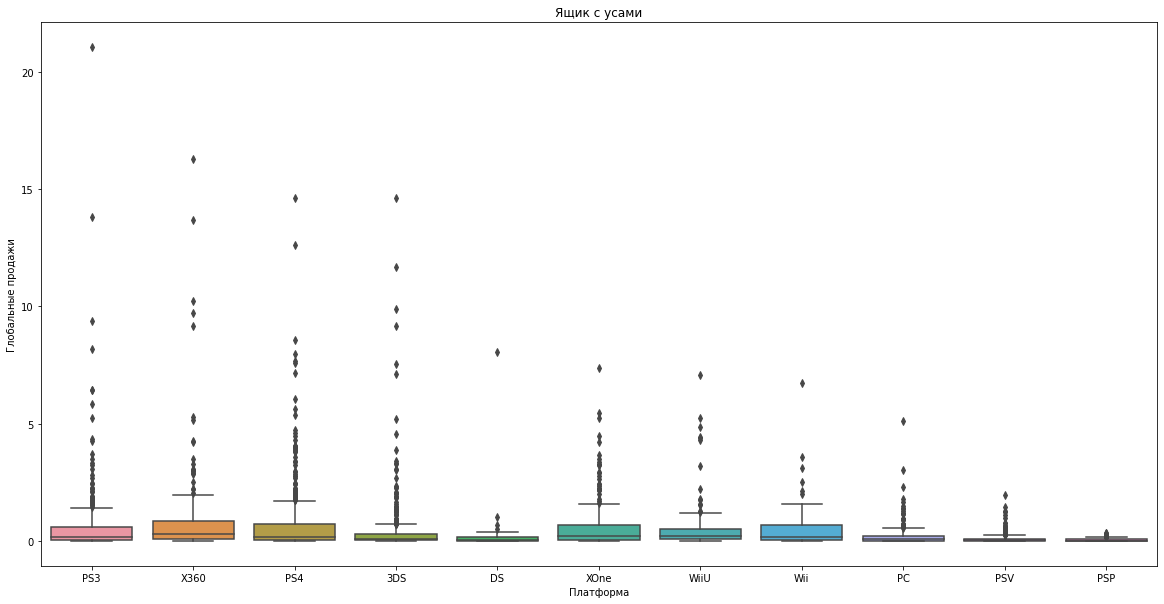

In [40]:
plt.figure(figsize=(20,10))
sns.boxplot(data=games_p, x='platform', y='total_sales')
plt.title('Ящик c усами')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи')

(0.0, 2.0)

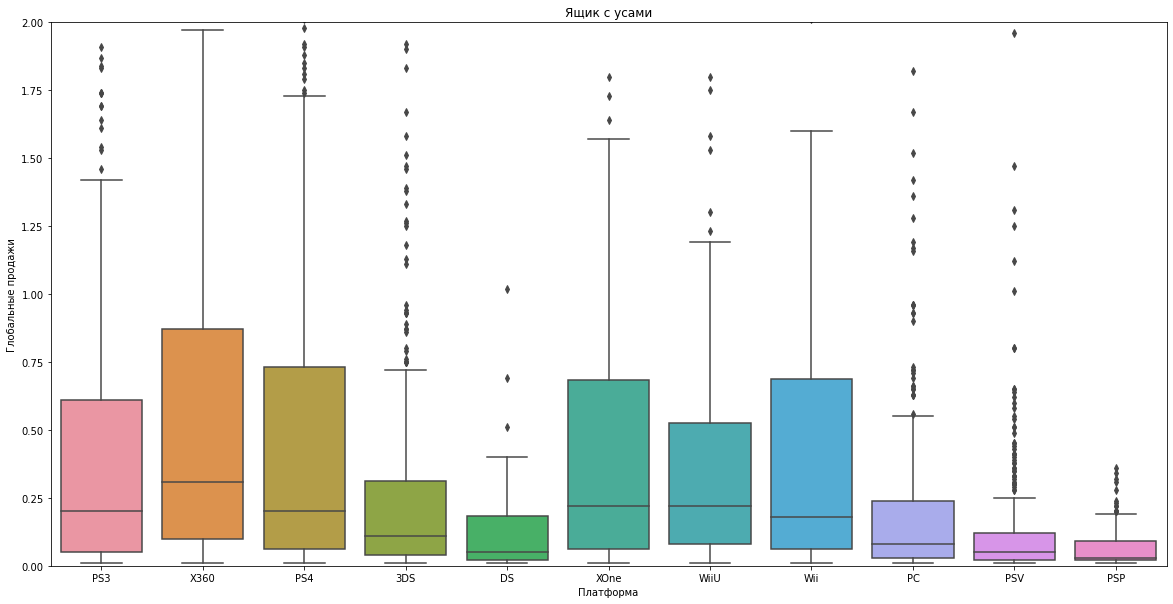

In [41]:
plt.figure(figsize=(20,10))
sns.boxplot(data=games_p, x='platform', y='total_sales')
plt.title('Ящик c усами')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи')
plt.ylim(0, 2)

**Вывод:**

- Медиана у всех платформ разная. Минимальная медиана у платформы PSP - 0.03. Максимальная у платформы X360 - 0.31.
- Больше всех продаж у X360, PS4, Wii, XOne, PS3.
- Платформы PC, DS, PSV и PSP плохо продается в актуальном периоде времени, их прибыль не превышает 250 тыс.
- Большинство платформ имеют большое количество выбросов.

### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируем выводы.

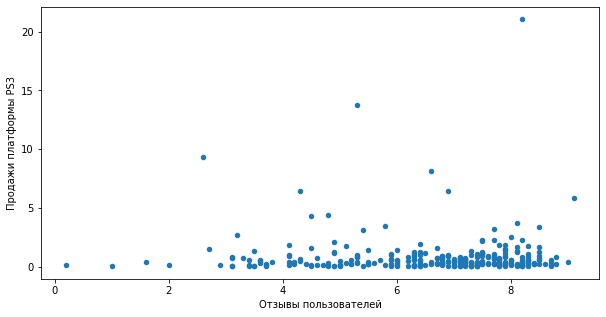

In [43]:
games_p.query('platform == "PS3" and user_score > 0').plot(kind='scatter', 
                                                                  x='user_score', y='total_sales', figsize=(10, 5))
plt.xlabel('Отзывы пользователей')
plt.ylabel('Продажи платформы PS3')
plt.show()

In [44]:
games_p.query('platform == "PS3" and user_score > 0')['user_score']\
.corr(games_p.query('platform == "PS3" and user_score > 0')['total_sales'])

-0.0041581894802458766

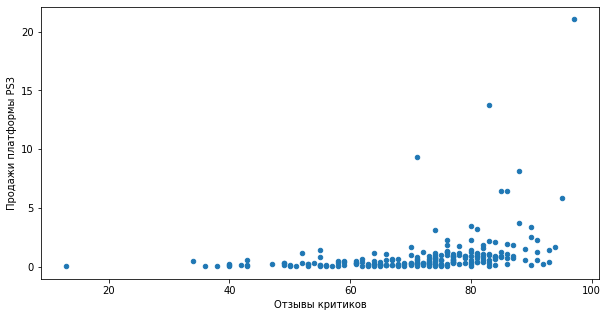

In [45]:
games_p.query('platform == "PS3" and critic_score > 0').plot(kind='scatter', 
                                                                  x='critic_score', y='total_sales', figsize=(10, 5))
plt.xlabel('Отзывы критиков')
plt.ylabel('Продажи платформы PS3')
plt.show()

In [46]:
games_p.query('platform == "PS3" and critic_score > 0')['critic_score'].corr(games_p.query('platform == "PS3" and critic_score > 0')['total_sales'])

0.33205850244757606

**Вывод:**

По платформе PS3 между продажами и отзывами пользователей, по выше данным, связь отсутствует - 0.005. Аналогичная ситуация с отзывами критиков, только связь между продажами и отзывами составляет небольшую прямую связь 0.33. В двух зависимостях имеются выбросы.

### Соотнесем выводы с продажами игр на других платформах.

In [47]:
platform_p = ['X360', 'PS4', '3DS', 'WiiU', 'XOne' ]

                                         X360                                         


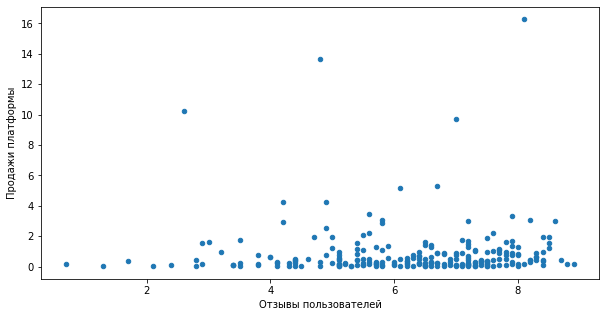

Корреляция между отзывыми критиков и продажами платформы X360: 0.006163978646213326
------------------------------------------------------------------------------------------
                                         PS4                                         


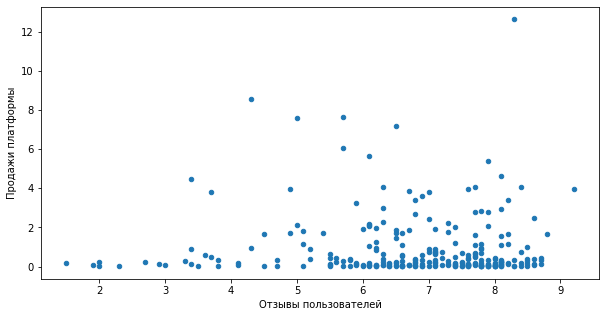

Корреляция между отзывыми критиков и продажами платформы PS4: -0.031957110204556376
------------------------------------------------------------------------------------------
                                         3DS                                         


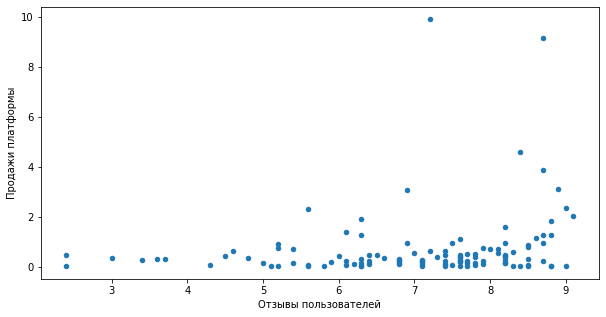

Корреляция между отзывыми критиков и продажами платформы 3DS: 0.19758263411038599
------------------------------------------------------------------------------------------
                                         WiiU                                         


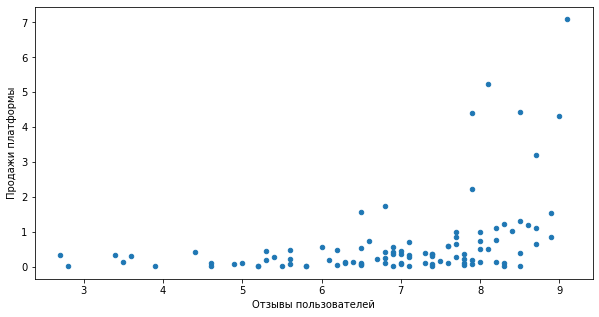

Корреляция между отзывыми критиков и продажами платформы WiiU: 0.4002190202148617
------------------------------------------------------------------------------------------
                                         XOne                                         


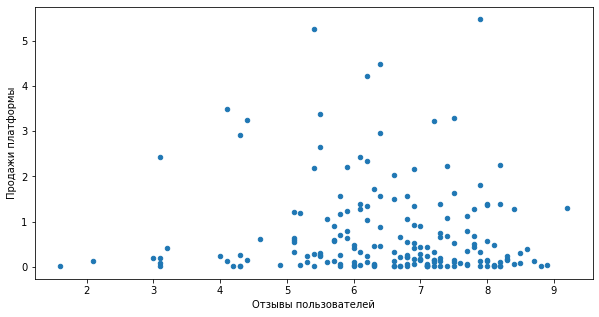

Корреляция между отзывыми критиков и продажами платформы XOne: -0.06892505328279414
------------------------------------------------------------------------------------------


In [48]:
for i in platform_p:
    print(' '*40, i,' '*40)
    games_p.query('platform == @i and user_score > 0').plot(kind='scatter', 
                                                                      x='user_score', y='total_sales', figsize=(10, 5))
    plt.xlabel('Отзывы пользователей')
    plt.ylabel('Продажи платформы')
    plt.show()
    print(f'Корреляция между отзывыми критиков и продажами платформы {i}:', 
          games_p.query('platform == @i and user_score > 0')['user_score']\
    .corr(games_p.query('platform == @i and user_score > 0')['total_sales']))
    print('-'*90)
    

                                         X360                                         


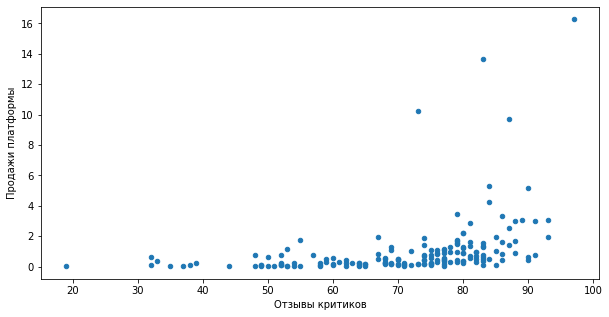

Корреляция между отзывами критиков и продажами платформы X360: 0.3605734888507336
------------------------------------------------------------------------------------------
                                         PS4                                         


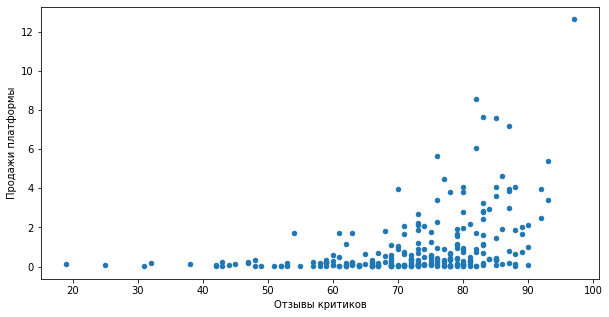

Корреляция между отзывами критиков и продажами платформы PS4: 0.40656790206178095
------------------------------------------------------------------------------------------
                                         3DS                                         


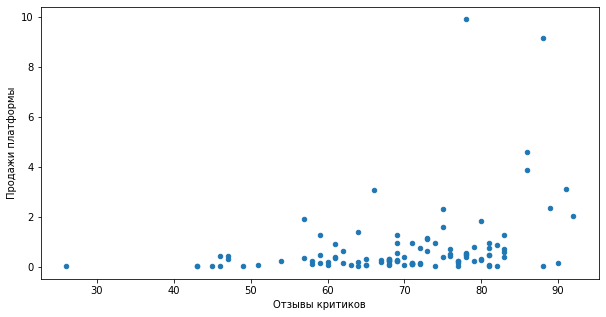

Корреляция между отзывами критиков и продажами платформы 3DS: 0.3208028695360785
------------------------------------------------------------------------------------------
                                         WiiU                                         


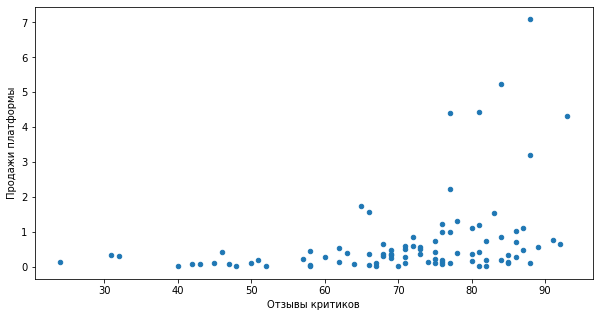

Корреляция между отзывами критиков и продажами платформы WiiU: 0.34837976012017485
------------------------------------------------------------------------------------------
                                         XOne                                         


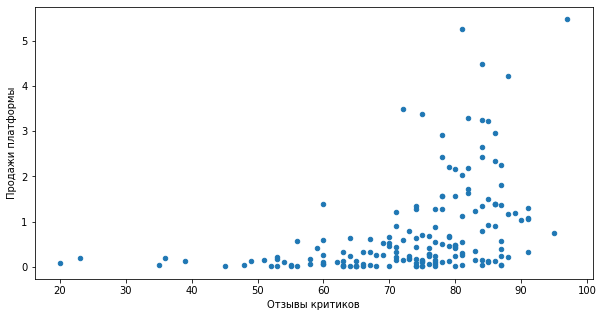

Корреляция между отзывами критиков и продажами платформы XOne: 0.4169983280084017
------------------------------------------------------------------------------------------


In [49]:
for i in platform_p:
    print(' '*40, i,' '*40)
    games_p.query('platform == @i and critic_score > 0').plot(kind='scatter', 
                                                                      x='critic_score', y='total_sales', figsize=(10, 5))
    plt.xlabel('Отзывы критиков')
    plt.ylabel('Продажи платформы')
    plt.show()
    print(f'Корреляция между отзывами критиков и продажами платформы {i}:', 
          games_p.query('platform == @i and critic_score > 0')['critic_score']\
    .corr(games_p.query('platform == @i and critic_score > 0')['total_sales']))
    print('-'*90)

**Вывод:**

По платформам связь между продажами и отзывами пользователей и критиков:
- По платформе X360 между продажами и отзывами пользователей, по выше данным, связь очень слабая 0.006. Аналогичная ситуация с отзывами критиков, только связь между продажами и отзывами составляет слабую связь 0.36. Имеются выбросы.
- По платформе PS4 между продажами и отзывами пользователей, по выше данным, связь очень слабая - 0.03 Аналогичная ситуация с отзывами критиков, только связь между продажами и отзывами составляет слабую связь 0.41. Имеются выбросы.
- По платформе 3DS между продажами и отзывами пользователей, по выше данным, связьочень слабая - 0.20. Аналогичная ситуация с отзывами критиков,  связь между продажами и отзывами составляет слабую связь 0.32. Имеются выбросы.
- По платформе WiiU между продажами и отзывами пользователей, по выше данным, слабую связь 0.40. Аналогичная ситуация с отзывами критиков,только связь между продажами и отзывами составляет слабую связь 0.35. Имеются выбросы.
- По платформе XOne между продажами и отзывами пользователей, по выше данным, связь очень слабая - 0.07. Аналогичная ситуация с отзывами критиков, только связь между продажами и отзывами составляет слабую связь 0.42. Имеются выбросы.

### Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

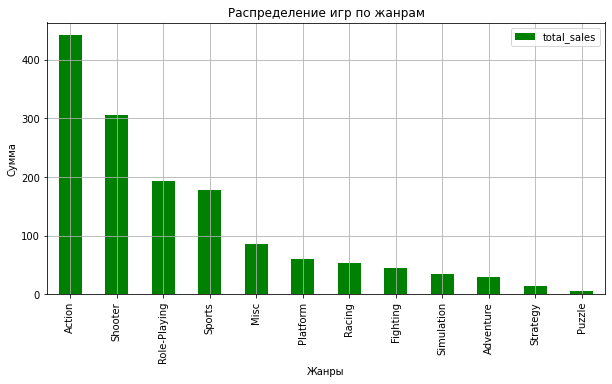

In [50]:
games_p.pivot_table(index='genre', values = 'total_sales', aggfunc = 'sum').sort_values(by='total_sales', 
     ascending=False).plot(title = 'Распределение игр по жанрам',
     kind = 'bar', grid = True, figsize=(10,5), color = 'green')
plt.xlabel('Жанры')
plt.ylabel('Сумма')
plt.show() 

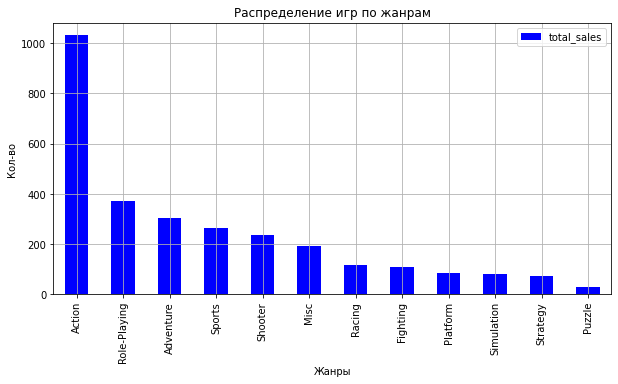

In [51]:
games_p.pivot_table(index='genre', values = 'total_sales', aggfunc = 'count').sort_values(by='total_sales', 
     ascending=False).plot(title = 'Распределение игр по жанрам',
     kind = 'bar', grid = True, figsize=(10,5), color = 'blue')
plt.xlabel('Жанры')
plt.ylabel('Кол-во')
plt.show() 

Text(0, 0.5, 'Глобальные продажи')

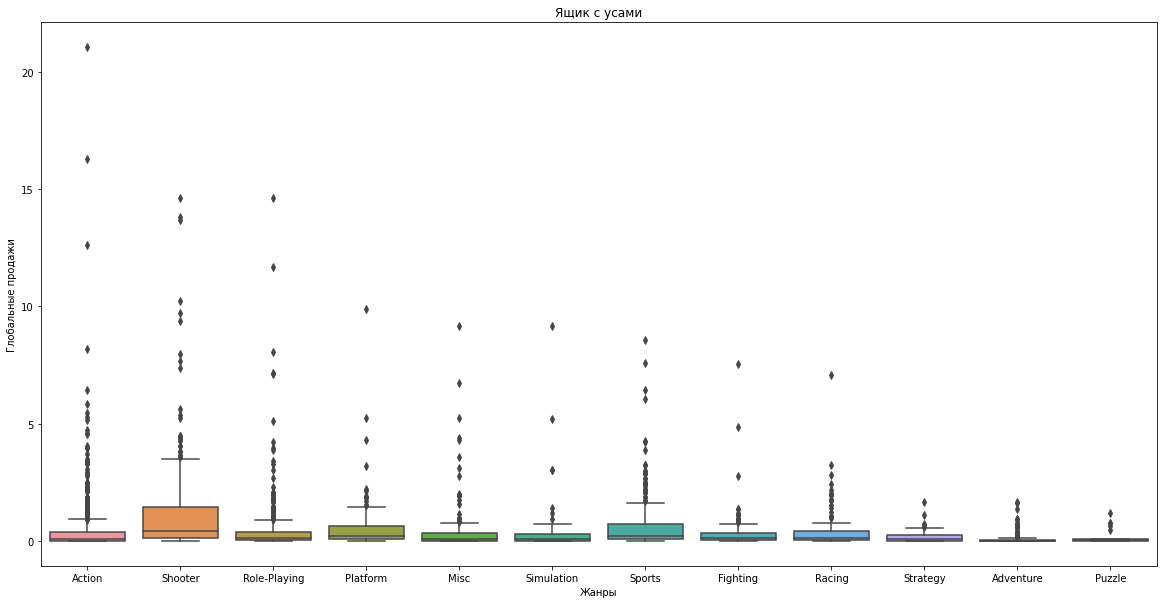

In [52]:
plt.figure(figsize=(20,10))
sns.boxplot(data=games_p, x='genre', y='total_sales')
plt.title('Ящик c усами')
plt.xlabel('Жанры')
plt.ylabel('Глобальные продажи')

(0.0, 4.0)

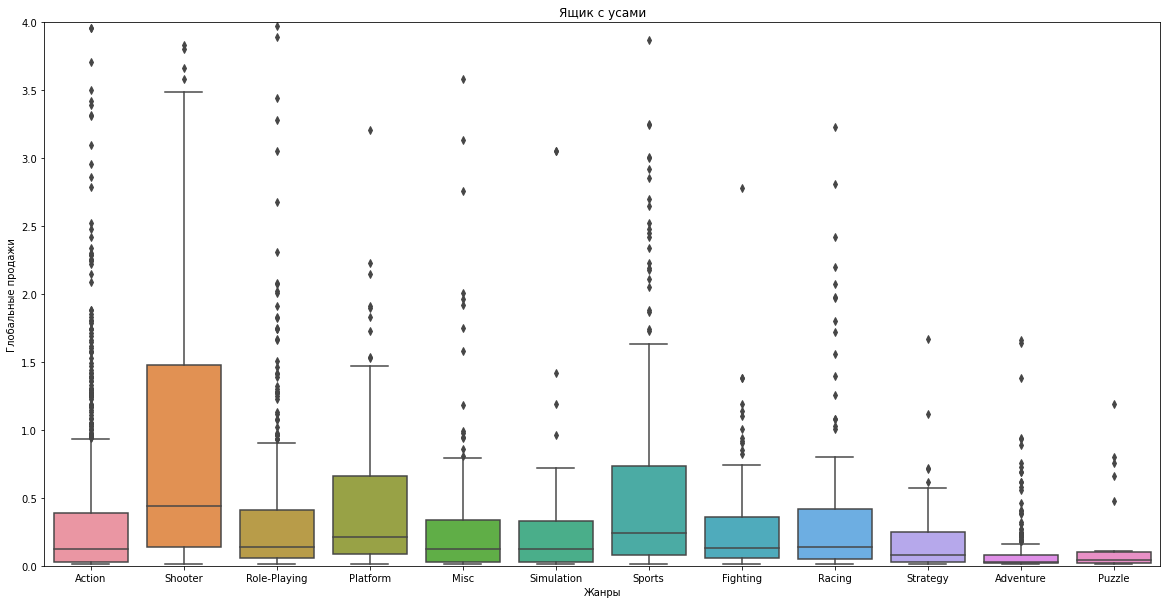

In [53]:
plt.figure(figsize=(20,10))
sns.boxplot(data=games_p, x='genre', y='total_sales')
plt.title('Ящик c усами')
plt.xlabel('Жанры')
plt.ylabel('Глобальные продажи')
plt.ylim(0, 4)

**Вывод:**

- По прожадам на первом месте жанр Action, после него идет жанр Sports, Shooter, Misc, Role-Playing, но если смотреть медианные продажи то, на первом месте Shooter, после него Sports, Platform, Fighting, Misc, Simulation.
- Низкие продажи у жанров Simulation, Fighting, Adventure, Puzzle и самый низкий по продажам Strategy. По медианным значениям низкие продажи у жанров Misc, Simulation, Racing, Strategy, Adventure и Puzzle.
- По количеству проданных на первом месте также жанр Action , после него идет жанр Sports, Misc, Role-Playing, Adventure
- Меньше проданных копий составило у Racing, Fighting, Platform, Strategy и Puzzle.


**Промежуточный вывод:**
<p></p>

<div style="border:solid green 2px; padding: 10px">

1. В период с 1980 года по 1994 выпускалось мало игр, не во всех странах в то время были компьютеры, и это было неактуально, также было мало компаний, которые занимались играми. С 2002 года количество игр начало расти в большом количестве. Пик был с 2007 по 2011 год. Потом количество новых игр уменьшилось, вероятно, связано с эрой мобильных телефон и планшетов. Данные за все периоды не важны, актуальные и показательные данные могла быть с 2002 по 2016 год.

    
2. Самые популярные игровые платформы по продажам за весь период это PS2, X360, PS3, Wii, DS, PS. 
    

3. За какой период исчезают старые платформы и как скоро появляются новые и какой имеют срок:
- платформа PS прожила с 1994 по 2003 год (9 лет).
- платформа PS2 начала появляться параллельно живой PS c 2000 года по 2011 год (11 лет).
- платформа DS появилась в 1985 году, до 2004 года не было данных, скорее всего данне еще не ввелись, она начала появляться параллельно живой PS2 c 2004 года по 2013 год (9 лет).
- платформа Wii начала появляться параллельно живой DS и PS2 c 2006 года по 2016 год (10 лет).
- платформа X360 начала появляться параллельно живой DS, PS2 и Wii  c 2005 года по 2016 год (9 лет).
- платформа PS3 начала появляться параллельно живой DS, PS2, X360  и Wii c 2006 года по 2016 год (10 лет).

По данным средний срок жизни консоли около 7 лет, возможно они бы продолжали работать дальше, но приходят новые консоли, они обновляются и становятся лучше. В старых уже нет потребности.
    
    
4. Наиболее топовые платформы вышли с 2005 года по 2016 год. В этот период есть все данные, чтобы построить прогноз на 2017 год.

    
5. Платформа PS3 больше всех заработала в 2012 году (больше 100 млн.), последующие год также была в топе.
В 2013 году вышла новая платформа PS4 и она начала лидировать ближе к 2014 году до конца 2016 года.
На 2016 год топ лидирующих платформ:
- PS4 
- XOne
- 3DC
    
6.  
- Медиана у всех платформ разная. Минимальная медиана у платформы PSP - 0.03. Максимальная у платформы X360 - 0.31.
- Больше всех продаж у X360, PS4, Wii, XOne, PS3.
- Платформы PC, DS, PSV и PSP плохо продается в актуальном периоде времени, их прибыль не превышает 250 тыс.
- Большинство платформ имеют большое количество выбросов.
    
    
7. По платформам связь между продажами и отзывами пользователей и критиков:

-  По платформе PS3 между продажами и отзывами пользователей, по выше данным, связь отсутствует - 0.005. Аналогичная ситуация с отзывами критиков, только связь между продажами и отзывами составляет небольшую прямую связь 0.33. В двух зависимостях имеются выбросы.
- По платформе X360 между продажами и отзывами пользователей, по выше данным, связь отсутствует 0.006. Аналогичная ситуация с отзывами критиков, только связь между продажами и отзывами составляет небольшую прямую связь 0.36. Имеются выбросы.
- По платформе PS4 между продажами и отзывами пользователей, по выше данным, связь отсутствует - 0.03 Аналогичная ситуация с отзывами критиков, только связь между продажами и отзывами составляет небольшую прямую связь 0.41. Имеются выбросы.
- По платформе 3DS между продажами и отзывами пользователей, по выше данным, связь отсутствует  0.20. Аналогичная ситуация с отзывами критиков,  связь между продажами и отзывами составляет небольшую прямую связь 0.32. Имеются выбросы.
- По платформе WiiU между продажами и отзывами пользователей, по выше данным, небольшая прямая связь 0.40. Аналогичная ситуация с отзывами критиков,только связь между продажами и отзывами составляет небольшую прямую связь 0.35.Имеются выбросы.
- По платформе XOne между продажами и отзывами пользователей, по выше данным, связь отсутствует - 0.07. Аналогичная ситуация с отзывами критиков, только связь между продажами и отзывами составляет небольшую прямую связь 0.42. Имеются выбросы.   
    
8.  - По прожадам на первом месте жанр Action, после него идет жанр Sports, Shooter, Misc, Role-Playing, но если смотреть медианные продажи то, на первом месте Shooter, после него Sports, Platform, Fighting, Misc, Simulation.
    - Низкие продажи у жанров Simulation, Fighting, Adventure, Puzzle и самый низкий по продажам Strategy. По медианным значениям низкие продажи у жанров Misc, Simulation, Racing, Strategy, Adventure и Puzzle.
    - По количеству проданных на первом месте также жанр Action , после него идет жанр Sports, Misc, Role-Playing, Adventure
    - Меньше проданных копий составило у Racing, Fighting, Platform, Strategy и Puzzle.

</div>

## Шаг 4. Составим портрет пользователя каждого региона

### Определим для пользователя каждого региона (NA, EU, JP):


#### Самые популярные платформы (топ-5). Опишим различия в долях продаж.

In [54]:
games_p.pivot_table(index='platform', values = 'na_sales', aggfunc = 'sum').sort_values(by='na_sales', 
     ascending=False)[:5]   

,na_sales
platform,
X360,140.05
PS4,108.74
PS3,101.27
XOne,93.12
3DS,55.31


In [55]:
def platform(i):
     if i['platform'] == "X360":
        return 'X360'
     if i['platform'] == "PS4":
        return 'PS4'
     if i['platform'] == "PS3":
        return 'PS3'
     if i['platform'] == "XOne":
        return 'XOne'
     if i['platform'] == "3DS":
        return '3DS'
     else:
        return 'другой'
games_p = games_p.copy()    
games_p['platform_na'] = games_p.apply(platform, axis=1)   

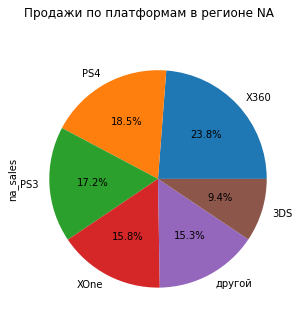

In [56]:
games_p.pivot_table(index='platform_na', values = 'na_sales', aggfunc = 'sum').sort_values(by='na_sales', 
     ascending=False).plot(title = 'Продажи по платформам в регионе NA',
     kind = 'pie',  autopct='%1.1f%%', subplots=True, legend=False, figsize=(10,5))
plt.show() 

In [57]:
games_p.pivot_table(index='platform', values = 'eu_sales', aggfunc = 'sum').sort_values(by='eu_sales', 
     ascending=False)[:5] 

,eu_sales
platform,
PS4,141.09
PS3,106.63
X360,74.52
XOne,51.59
3DS,42.64


In [58]:
def platform(i):
     if i['platform'] == "X360":
        return 'X360'
     if i['platform'] == "PS4":
        return 'PS4'
     if i['platform'] == "PS3":
        return 'PS3'
     if i['platform'] == "XOne":
        return 'XOne'
     if i['platform'] == "3DS":
        return '3DS'
     else:
        return 'другой'
games_p = games_p.copy()     
games_p['platform_eu'] = games_p.apply(platform, axis=1)   

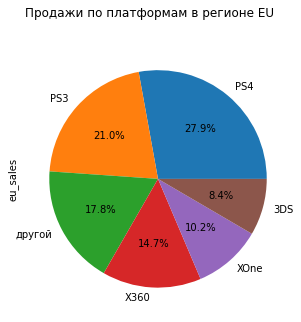

In [59]:
games_p.pivot_table(index='platform_eu', values = 'eu_sales', aggfunc = 'sum').sort_values(by='eu_sales', 
     ascending=False).plot(title = 'Продажи по платформам в регионе EU',
     kind = 'pie',  autopct='%1.1f%%', subplots=True, legend=False, figsize=(10,5))
plt.show() 

In [60]:
games_p.pivot_table(index='platform', values = 'jp_sales', aggfunc = 'sum').sort_values(by='jp_sales', 
     ascending=False)[:5] 

,jp_sales
platform,
3DS,87.79
PS3,35.29
PSV,21.04
PS4,15.96
WiiU,13.01


In [61]:
def platform(i):
     if i['platform'] == "3DS":
        return '3DS'
     if i['platform'] == "PS3":
        return 'PS3'
     if i['platform'] == "PSV":
        return 'PSV'
     if i['platform'] == "PS4":
        return 'PS4'
     if i['platform'] == "WiiU":
        return 'WiiU'
     else:
        return 'другой'
games_p = games_p.copy()   
games_p['platform_jp'] = games_p.apply(platform, axis=1)   

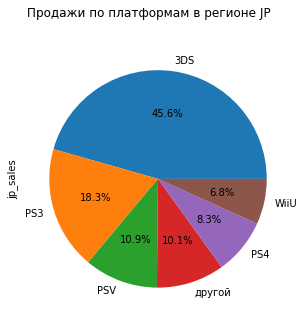

In [62]:
games_p.pivot_table(index='platform_jp', values = 'jp_sales', aggfunc = 'sum').sort_values(by='jp_sales', 
     ascending=False).plot(title = 'Продажи по платформам в регионе JP',
     kind = 'pie',  autopct='%1.1f%%', subplots=True, legend=False, figsize=(10,5))
plt.show() 

**Вывод:**

- Топ-5 продаж платформ в  Северной Америке: X360(23.7%), PS4(18.4%), PS3(17.5%), XOne(15.8%), 3DS(9.4%).
- Топ-5 продаж платформ в Европе: PS4(27.8%), PS3(21.1%), X360(14.7%), XOne(10.2%), 3DS(8.4%).
- Топ-5 продаж платформ в Японии: 3DS(45.6%), PS3(18.3%), PSV(10.9%), PS4(8.3%), WiiU(6.8%).

#### Самые популярные жанры (топ-5). Поясним разницу.

In [63]:
games_p.pivot_table(index='genre', values = 'na_sales', aggfunc = 'sum').sort_values(by='na_sales', 
     ascending=False)[:5]   

,na_sales
genre,
Action,177.84
Shooter,144.77
Sports,79.42
Role-Playing,64.00
Misc,38.19


In [64]:
def genre(i):
     if i['genre'] == "Action":
        return 'Action'
     if i['genre'] == "Shooter":
        return 'Shooter'
     if i['genre'] == "Sports":
        return 'Sports'
     if i['genre'] == "Role-Playing":
        return 'Role-Playing'
     if i['genre'] == "Misc":
        return 'Misc'
     else:
        return 'другой'
games_p = games_p.copy()   
games_p['genre_na'] = games_p.apply(genre, axis=1)   

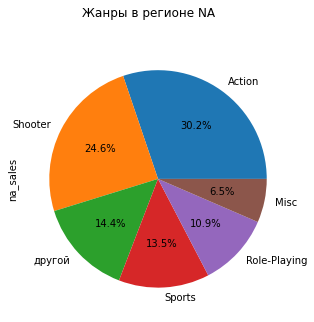

In [65]:
games_p.pivot_table(index='genre_na', values = 'na_sales', aggfunc = 'sum').sort_values(by='na_sales', 
     ascending=False).plot(title = 'Жанры в регионе NA',
     kind = 'pie',  autopct='%1.1f%%', subplots=True, legend=False, figsize=(10,5))
plt.show() 

In [66]:
games_p.pivot_table(index='genre', values = 'eu_sales', aggfunc = 'sum').sort_values(by='eu_sales', 
     ascending=False)[:5]  

,eu_sales
genre,
Action,159.34
Shooter,113.47
Sports,68.86
Role-Playing,48.53
Racing,27.29


In [67]:
def genre(i):
     if i['genre'] == "Action":
        return 'Action'
     if i['genre'] == "Shooter":
        return 'Shooter'
     if i['genre'] == "Sports":
        return 'Sports'
     if i['genre'] == "Role-Playing":
        return 'Role-Playing'
     if i['genre'] == "Racing":
        return 'Racingsc'
     else:
        return 'другой'
games_p = games_p.copy()   
games_p['genre_eu'] = games_p.apply(genre, axis=1)   

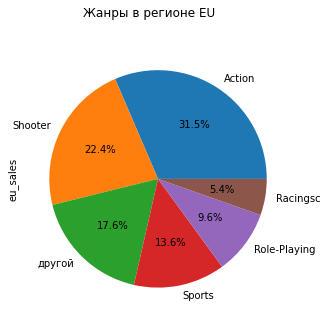

In [68]:
games_p.pivot_table(index='genre_eu', values = 'eu_sales', aggfunc = 'sum').sort_values(by='eu_sales', 
     ascending=False).plot(title = 'Жанры в регионе EU',
     kind = 'pie',  autopct='%1.1f%%', subplots=True, legend=False, figsize=(10,5))
plt.show() 

In [69]:
games_p.pivot_table(index='genre', values = 'jp_sales', aggfunc = 'sum').sort_values(by='jp_sales', 
     ascending=False)[:5]  

,jp_sales
genre,
Role-Playing,65.44
Action,52.80
Misc,12.86
Simulation,10.41
Fighting,9.44


In [70]:
def genre(i):
     if i['genre'] == "Action":
        return 'Action'
     if i['genre'] == "Simulation":
        return 'Simulation'
     if i['genre'] == "Misc":
        return 'Misc'
     if i['genre'] == "Role-Playing":
        return 'Role-Playing'
     if i['genre'] == "Fighting":
        return 'Fighting'
     else:
        return 'другой'
games_p = games_p.copy()   
games_p['genre_jp'] = games_p.apply(genre, axis=1)  

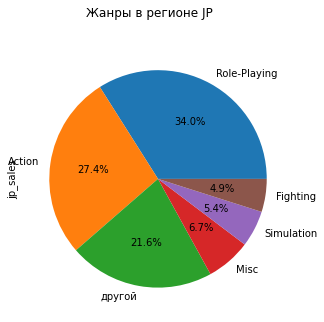

In [71]:
games_p.pivot_table(index='genre_jp', values = 'jp_sales', aggfunc = 'sum').sort_values(by='jp_sales', 
     ascending=False).plot(title = 'Жанры в регионе JP',
     kind = 'pie', autopct='%1.1f%%', subplots=True, legend=False, figsize=(10,5))
plt.show() 

**Вывод:**

- Топ-5 жанров платформ в Северной Америке: Action(30.1%), Shooter(24.5%), Sports(13.8%),Role-Plaing(10.8%) и Misc(6.5%).
- Топ-5 жанров платформ в Европе: Action(31.4%), Shooter(22.4%), Sports(13.6%), Role-Plaing(9.6%) и Racingsc(5.4%).
- Топ-5 жанров платформ в Японии: Role-Plaing(34.0%), Action(27.4%), Misc(6.7%), Simulation(5.4%) и Fighting(4.9%).

В Северной Америке и Европе вкусы пользователей схожи, только 5 место отличается по жанрам.
В Японии на первом месте ролевые игры.

#### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

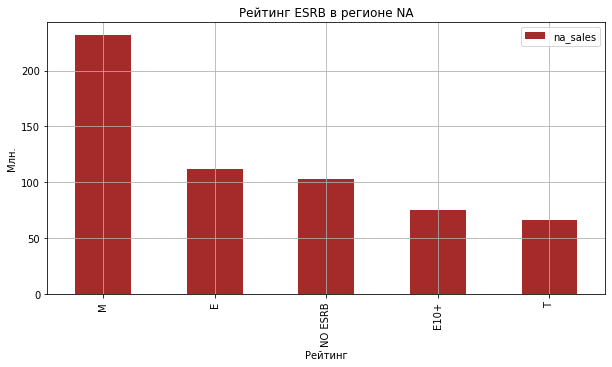

In [72]:
games_p.pivot_table(index='rating', values = 'na_sales', aggfunc = 'sum').sort_values(by='na_sales', 
     ascending=False).plot(title = 'Рейтинг ESRB в регионе NA',
     kind = 'bar', grid = True, figsize=(10,5), color = 'brown')
plt.xlabel('Рейтинг')
plt.ylabel('Млн.')
plt.show()

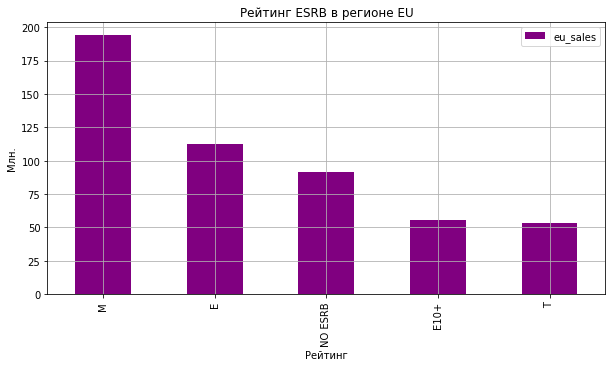

In [73]:
games_p.pivot_table(index='rating', values = 'eu_sales', aggfunc = 'sum').sort_values(by='eu_sales', 
     ascending=False).plot(title = 'Рейтинг ESRB в регионе EU',
     kind = 'bar', grid = True, figsize=(10,5), color = 'purple')
plt.xlabel('Рейтинг')
plt.ylabel('Млн.')
plt.show() 

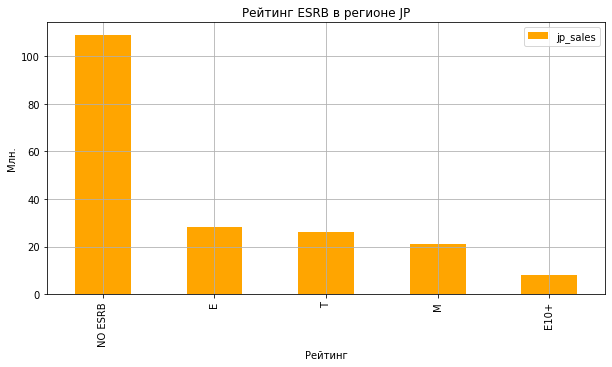

In [74]:
games_p.pivot_table(index='rating', values = 'jp_sales', aggfunc = 'sum').sort_values(by='jp_sales', 
     ascending=False).plot(title = 'Рейтинг ESRB в регионе JP',
     kind = 'bar', grid = True, figsize=(10,5), color = 'orange')
plt.xlabel('Рейтинг')
plt.ylabel('Млн.')
plt.show() 

**Вывод:**

Обозначим для себя, что означает данные рейтинг:
- EС - для детей от 3-х лет.
- E - для всех возрастных категорий.
- E10+ - для лиц старше 10 лет.
- T - для лиц старше 13 лет.
- М - для лиц старше 17 лет.
- AO - для лиц старше 17 лет.
- RP - возраст неопределен, в процессе.

По данным выше: 

- Самый топовый рейтинг по Северной Америки и Европы рейтинг M, а у Японии NO ESRB (рейтинг ESRB предназначен для маркировки игр для США и Канады. И вероятней он в других регионах не везде заполняется).
- Рейтинги у Северной Америки и Европы схожи, имеют по убыванию рейтинги M, E, NO ESRB,  E10+, T.
- У Японии на первом месте рейтинг NO ESRB, а уже после идут E, T,  M, E10+.


**Промежуточный вывод:**
<p></p>

<div style="border:solid green 2px; padding: 10px">
    
1.  - Топ-5 продаж платформ в  Северной Америке: X360(23.7%), PS4(18.4%), PS3(17.5%), XOne(15.8%), 3DS(9.4%).
    - Топ-5 продаж платформ в Европе: PS4(27.8%), PS3(21.1%), X360(14.7%), XOne(10.2%), 3DS(8.4%).
    - Топ-5 продаж платформ в Японии: 3DS(45.6%), PS3(18.3%), PSV(10.9%), PS4(8.3%), WiiU(6.8%).
    
    
2.  - Топ-5 жанров платформ в Северной Америке: Action(30.1%), Shooter(24.5%), Sports(13.8%),Role-Plaing(10.8%) и Misc(6.5%).
    - Топ-5 жанров платформ в Европе: Action(31.4%), Shooter(22.4%), Sports(13.6%), Role-Plaing(9.6%) и Racingsc(5.4%).
    - Топ-5 жанров платформ в Японии: Role-Plaing(34.0%), Action(27.4%), Misc(6.7%), Simulation(5.4%) и Fighting(4.9%).

В Северной Америке и Европе вкусы пользователей схожи, только 5 место отличается по жанрам.
В Японии на первом месте ролевые игры.

В Северной Америке и Европе вкусы пользователей схожи, только 5 место отличается по жанрам.
В Японии на первом месте ролевые игры, причем в большом отрыве от других топовых жанров.
        
    
3. Обозначим для себя, что означает данные рейтинг:
- EС - для детей от 3-х лет.
- E - для всех возрастных категорий.
- E10+ - для лиц старше 10 лет.
- T - для лиц старше 13 лет.
- М - для лиц старше 17 лет.
- AO - для лиц старше 17 лет.
- RP - возраст неопределен, в процессе.
    
    
- Самый топовый рейтинг по Северной Америки и Европы рейтинг M, а у Японии NO ESRB (рейтинг ESRB предназначен для маркировки игр для США и Канады. И вероятней он в других регионах не везде заполняется).
- Рейтинги у Северной Америки и Европы схожи, имеют по убыванию рейтинги M, E, NO ESRB,  E10+, T.
- У Японии на первом месте рейтинг NO ESRB, а уже после идут E, T,  M, E10+.    
    

## Шаг 5. Проверим гипотезы

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

In [75]:
games_p.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,platform_na,platform_eu,platform_jp,genre_na,genre_eu,genre_jp
16,grand theft auto v,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05,PS3,PS3,PS3,Action,Action,Action
23,grand theft auto v,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27,X360,X360,другой,Action,Action,Action
31,call of duty: black ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,NO ESRB,14.63,PS4,PS4,PS4,Shooter,Shooter,другой
33,pokemon x/pokemon y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,NO ESRB,14.60,3DS,3DS,3DS,Role-Playing,Role-Playing,Role-Playing
34,call of duty: black ops ii,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79,PS3,PS3,PS3,Shooter,Shooter,другой


In [76]:
games_p_1 = games_p[(games_p['platform'] == 'XOne') & (games_p['user_score'] > 0)]['user_score']

In [77]:
games_p_1.describe()

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

In [78]:
games_p_2 = games_p[(games_p['platform'] == 'PC') & (games_p['user_score'] > 0)]['user_score']

In [79]:
games_p_2.describe()

count    206.000000
mean       6.428641
std        1.664465
min        1.400000
25%        5.500000
50%        6.800000
75%        7.700000
max        9.300000
Name: user_score, dtype: float64

H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

H1: Средние пользовательские рейтинги платформ Xbox One и PC разные.
    

У нас две независимые выборки. Применим метод t-Стьюдента, метод st.ttest_ind.

Уровень статистической значимости примем 0.01.

Примем equal_var=False, потому что как мы видим выше по данным дисперсии неравны.

In [80]:
alpha = 0.01 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу


results = st.ttest_ind(games_p_2, games_p_1, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


**Вывод:**

Не получилось отвергнуть нулевую гипотезу. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. 

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [81]:
games_p_3 = games_p[(games_p['genre'] == 'Action') & (games_p['user_score'] > 0)]['user_score']

In [82]:
games_p_3.describe()

count    523.000000
mean       6.825048
std        1.374440
min        1.600000
25%        6.250000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64

In [83]:
games_p_4 = games_p[(games_p['genre'] == 'Sports') & (games_p['user_score'] > 0)]['user_score']

In [84]:
games_p_4.describe()

count    193.000000
mean       5.455440
std        1.747672
min        0.200000
25%        4.300000
50%        5.800000
75%        6.800000
max        8.800000
Name: user_score, dtype: float64

H0: Средние пользовательские рейтинги жанра Action и Sports одинаковые.

H1: Средние пользовательские рейтинги жанра Action и Sports разные.

У нас две независимые выборки. Применим метод t-Стьюдента, метод st.ttest_ind.

Уровень статистической значимости примем 0.01.

Примем equal_var=False, потому что как мы видим выше по данным дисперсии неравны.

In [85]:
alpha = 0.01 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

games_p_3 = games_p[(games_p['genre'] == 'Action') & (games_p['user_score'] > 0)]['user_score']
games_p_4 = games_p[(games_p['genre'] == 'Sports') & (games_p['user_score'] > 0)]['user_score']

results = st.ttest_ind(games_p_3, games_p_4, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 8.449849446620471e-20
Отвергаем нулевую гипотезу


**Вывод:**
На имеющихся данных, на уровне значимости 1% есть основания отвергнуть нулевую гипотезу о равенстве средних значений пользовательских рейтингов (отзывов) жанров Action и Sports в пользу альтернативной гипотезы. Средние пользовательские рейтинги жанра Action и Sports неодинаковые. По средним показателям видно, что средний пользовательский рейтинг жанра Action больше жанра Sports.

**Общий вывод:**
<p></p>

<div style="border:solid green 3px; padding: 10px">
    
*1. Изучили общую информацию:*
- Таблица состоит из 16715 записей.
- Найдено 0 явных и неявных дубликатов.
- Найдены пропуски.
- Есть некорректный тип данных.
- Название столбцов некорректны.
   
    
*2. Выполнили предобработку данных:**  
- Обработали пропуски.
- Заменили некорректые типы на корректные.
- Название столбцов сделали корректными.
- Добавили новый столбец total_sales - суммарные продажи во всех регионах.
    
*3. Провели исследовательский анализ данных:* 
    
    
   1. В период с 1980 года по 1994 выпускалось мало игр, не во всех странах в то время были компьютеры, и это было 
    неактуально, также было мало компаний, которые занимались играми. С 2002 года количество игр начало расти в большом 
    количестве. Пик был с 2007 по 2011 год. Потом количество новых игр уменьшилось, вероятно, связано с эрой мобильных 
    телефон и планшетов. Данные за все периоды не важны, актуальные и показательные данные могла быть с 2002 по 2016 год.

   2. Самые популярные игровые платформы по продажам за весь период это PS2, X360, PS3, Wii, DS, PS. 

   3. За какой период исчезают старые платформы и как скоро появляются новые и какой имеют срок:
    - платформа PS прожила с 1994 по 2003 год (9 лет).
    - платформа PS2 начала появляться параллельно живой PS c 2000 года по 2011 год (11 лет).
    - платформа DS появилась в 1985 году, до 2004 года не было данных, скорее всего данне еще не ввелись, она начала 
    появляться параллельно живой PS2 c 2004 года по 2013 год (9 лет).
    - платформа Wii начала появляться параллельно живой DS и PS2 c 2006 года по 2016 год (10 лет).
    - платформа X360 начала появляться параллельно живой DS, PS2 и Wii  c 2005 года по 2016 год (9 лет).
    - платформа PS3 начала появляться параллельно живой DS, PS2, X360  и Wii c 2006 года по 2016 год (10 лет).

    По данным средний срок жизни консоли около 7 лет, возможно они бы продолжали работать дальше, но 
    приходят новые консоли, они обновляются и становятся лучше. В старых уже нет потребности.

    
   4. Наиболее топовые платформы вышли с 2012 года по 2016 год. В этот период есть все данные, чтобы построить прогноз 
    на 2017 год.
    

   5.    Платформа PS3 больше всех заработала в 2012 году (больше 100 млн.), последующие год также была в топе.
        В 2013 году вышла новая платформа PS4 и она начала лидировать ближе к 2014 году до конца 2016 года.
        На 2016 год топ лидирующих платформ:
        - PS4 
        - XOne
        - 3DC

    
   6.  - Медиана у всех платформ разная. Минимальная медиана у платформы PSP - 0.03. Максимальная у платформы X360 - 0.31.
       - Больше всех продаж у X360, PS4, Wii, XOne, PS3.
       - Платформы PC, DS, PSV и PSP плохо продается в актуальном периоде времени, их прибыль не превышает 250 тыс.
       - Большинство платформ имеют большое количество выбросов.
    
   
   7. По платформам связь между продажами и отзывами пользователей и критиков:

    - По платформе PS3 между продажами и отзывами пользователей, по выше данным, связь отсутствует - 0.14. Аналогичная 
    ситуация с отзывами критиков, только связь между продажами и отзывами составляет небольшую прямую связь 0.42 и 
    имеется больше выбросов. Также заметим, что связь между двумя отзывами прямая (0.63). Получается, чем выше оценивает 
    критик, тем выше оценит пользователь.
    - По платформе X360 между продажами и отзывами пользователей, по выше данным, связь отсутствует - 0.11. Аналогичная 
    ситуация с отзывами критиков, только связь между продажами и отзывами составляет небольшую прямую связь 0.38. Также 
    заметим, что связь между двумя отзывами прямая (0.63). Получается, чем выше оценивает критик, тем выше оценит 
    пользователь.
    - По платформе PS2 между продажами и отзывами пользователей, по выше данным, связь отсутствует - 0.18. Аналогичная 
    ситуация с отзывами критиков, только связь между продажами и отзывами составляет небольшую прямую связь 0.43. Также 
    заметим, что связь между двумя отзывами прямая (0.50). Получается, чем выше оценивает критик, тем выше оценит 
    пользователь.
    - По платформе Wii между продажами и отзывами пользователей, по выше данным, связь отсутствует - 0.11. Аналогичная 
    ситуация с отзывами критиков, связь между продажами и отзывами отсутствует - 0.17. Также заметим, что связь между 
    двумя отзывами прямая (0.63). Получается, чем выше оценивает критик, тем выше оценит пользователь.
    - По платформе DS между продажами и отзывами пользователей, по выше данным, связь отсутствует - 0.14. Аналогичная
    ситуация с отзывами критиков, связь между продажами и отзывами отсутствует - 0.23. Также заметим, что связь между 
    двумя отзывами прямая (0.65). Получается, чем выше оценивает критик, тем выше оценит пользователь.   

   8.  - По прожадам на первом месте жанр Action, после него идет жанр Sports, Shooter, Misc, Role-Playing
        - Низкие продажи у жанров Simulation, Fighting, Adventure, Puzzle и самый низкий по продажам Strategy.
        - По количеству проданных на первом месте также жанр Action , после него идет жанр Sports, Misc, Role-Playing,
          Adventure.
        - Меньше проданных копий составило у Racing, Fighting, Platform, Strategy и Puzzle.

    
    
*4. Составили портрет пользователя каждого региона:*    
      
   1.   - Топ-5 продаж платформ в Северной Америке: X360(23.7%), PS4(18.4%), PS3(17.5%), XOne(15.8%), 3DS(9.4%).
        - Топ-5 продаж платформ в Европе: PS4(27.8%), PS3(21.1%), X360(14.7%), XOne(10.2%), 3DS(8.4%).
        - Топ-5 продаж платформ в Японии: 3DS(45.6%), PS3(18.3%), PSV(10.9%), PS4(8.3%), WiiU(6.8%).
    
    
   2.  - Топ-5 жанров платформ в Северной Америке: Action(30.1%), Shooter(24.5%), Sports(13.8%),Role-Plaing(10.8%) и                    Misc(6.5%).
       - Топ-5 жанров платформ в Европе: Action(31.4%), Shooter(22.4%), Sports(13.6%), Role-Plaing(9.6%) и Racingsc(5.4%).
       - Топ-5 жанров платформ в Японии: Role-Plaing(34.0%), Action(27.4%), Misc(6.7%), Simulation(5.4%) и Fighting(4.9%).

В Северной Америке и Европе вкусы пользователей схожи, только 5 место отличается по жанрам.
В Японии на первом месте ролевые игры.   
         
   3. Обозначим для себя, что означает данные рейтинг:
       - EС - для детей от 3-х лет.
       - E - для всех возрастных категорий.
       - E10+ - для лиц старше 10 лет.
       - T - для лиц старше 13 лет.
       - М - для лиц старше 17 лет.
       - AO - для лиц старше 17 лет.
       - RP - возраст неопределен, в процессе.

    - Самый топовый рейтинг по Северной Америки и Европы рейтинг M, а у Японии NO ESRB (рейтинг ESRB предназначен для маркировки игр для США и Канады. И вероятней он в других регионах не везде заполняется).
    - Рейтинги у Северной Америки и Европы схожи, имеют по убыванию рейтинги M, E, NO ESRB,  E10+, T.
    - У Японии на первом месте рейтинг NO ESRB, а уже после идут E, T,  M, E10+.     
    
*5. Проверили гипотезы:*
    
-  Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. По средним показателям видно, что средний пользовательский рейтинг платформы Xbox One равен платформе PC.    
- Средние пользовательские рейтинги жанра Action и Sports неодинаковые. По средним показателям видно, что средний пользовательский рейтинг жанра Action больше жанра Sports.
    
**Итог:** Выделим по исследованию две платформы: PS4 и X360 c жанром Action, c рейтингом М (для лиц старше 17 лет). Рекламировать стоит в регионах Европы, там и жанр и платформы продаются лучше. На отзывы обращать внимание не стоит, так как  зависимости между продажами нет.